In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from alphalens import utils
from alphalens import performance

In [3]:
trading_dates=get_trading_dates(datetime(2019,1,1),datetime(2019,12,31))
startDate=trading_dates[0]
endDate=trading_dates[-1]
stock_list=index_components('000300.XSHG')
factor_one_name='market_cap'
factor_two_name='basic_earnings_per_share'

In [4]:
q_one=query(fundamentals.eod_derivative_indicator.market_cap
           ).filter(fundamentals.eod_derivative_indicator.stockcode.in_(stock_list))
q_two=query(fundamentals.income_statement.basic_earnings_per_share
           ).filter(fundamentals.income_statement.stockcode.in_(stock_list))

In [5]:
#先处理因子1
df_facs_data_one=pd.DataFrame()
for i in range(len(trading_dates)):
    daily_fac_data=get_fundamentals(q_one,trading_dates[i],expect_df=True)
    daily_fac_data=daily_fac_data.reset_index()
    daily_fac_data['date']=trading_dates[i]
    daily_fac_data=daily_fac_data.set_index(['date','order_book_id'])
    df_facs_data_one=pd.concat([df_facs_data_one,daily_fac_data])

In [6]:
df_facs_data_one

market_cap
date       order_book_id              
2019-01-02 000001.XSHE    1.577961e+11
           000002.XSHE    2.638357e+11
           000063.XSHE    8.200866e+10
           000069.XSHE    4.897837e+10
           000100.XSHE    3.400962e+10
           000157.XSHE    2.709562e+10
           000166.XSHE    9.104522e+10
           000333.XSHE    2.427751e+11
           000338.XSHE    6.045912e+10
           000413.XSHE    2.561422e+10
           000415.XSHE    2.183136e+10
           000423.XSHE    2.586655e+10
           000425.XSHE    2.522441e+10
           000538.XSHE    7.490788e+10
           000568.XSHE    5.800420e+10
           000596.XSHE    2.659008e+10
           000625.XSHE    3.179353e+10
           000627.XSHE    2.771693e+10
           000629.XSHE    2.568334e+10
           000630.XSHE    2.052674e+10
           000651.XSHE    2.153632e+11
           000656.XSHE    3.251887e+10
           000661.XSHE    2.893610e+10
           000671.XSHE    2.085788e+10
           000703.XSHE    3.022151e+10
           000709.XSHE    3.026303e+10
           000723.XSHE    1.305147e+10
           000725.XSHE    8.977987e+10
           000728.XSHE    2.359178e+10
           000768.XSHE    3.668455e+10
...                                ...
2019-12-31 601838.XSHG    3.276312e+10
           601857.XSHG    1.067012e+12
           601877.XSHG    5.765323e+10
           601878.XSHG    3.710015e+10
           601881.XSHG    1.176936e+11
           601888.XSHG    1.736727e+11
           601898.XSHG    6.655849e+10
           601899.XSHG    1.164816e+11
           601901.XSHG    7.137232e+10
           601919.XSHG    6.460772e+10
           601933.XSHG    7.216128e+10
           601939.XSHG    1.807579e+12
           601985.XSHG    7.782723e+10
           601988.XSHG    1.086291e+12
           601989.XSHG    1.194827e+11
           601992.XSHG    3.982809e+10
           601997.XSHG    3.076435e+10
           601998.XSHG    3.019278e+11
           603019.XSHG    3.113268e+10
           603156.XSHG    3.061440e+10
           603160.XSHG    9.401757e+10
           603259.XSHG    1.521018e+11
           603260.XSHG    2.764286e+10
           603288.XSHG    2.903167e+11
           603501.XSHG    1.238491e+11
           603799.XSHG    4.248887e+10
           603833.XSHG    4.915991e+10
           603899.XSHG    4.484080e+10
           603986.XSHG    6.578523e+10
           603993.XSHG    9.417269e+10

[72644 rows x 1 columns]

In [7]:
def winsorize_series(series):
    q=series.quantile([0.02,0.98])
    if isinstance(q,pd.Series) and len(q)==2:
        series[series<q.iloc[0]]=q.iloc[0]
        series[series>q.iloc[1]]=q.iloc[1]
    return series

def standardize_series(series):
    std=series.std()
    mean=series.mean()
    return (series-mean)/std  

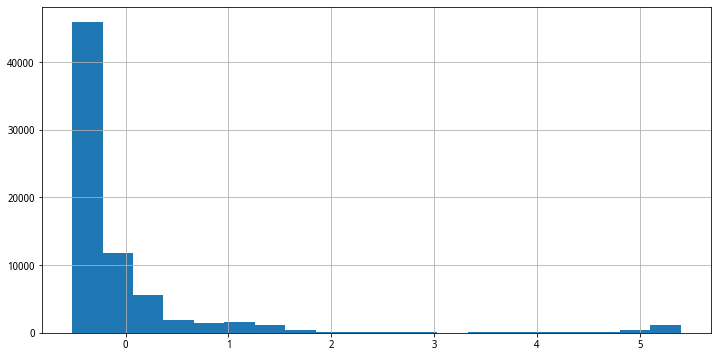

In [8]:
series_facs_data_one=df_facs_data_one['market_cap']
series_facs_data_one = series_facs_data_one.groupby(level = 'date').apply(winsorize_series)
series_facs_data_one = series_facs_data_one.groupby(level = 'date').apply(standardize_series)
series_facs_data_one.hist(figsize=(12,6),bins=20)
df_facs_data_one['market_cap']=series_facs_data_one

In [9]:
price=get_price(stock_list,start_date=startDate,end_date=endDate,fields='close')
price.head()

,601607.XSHG,300070.XSHE,000423.XSHE,000001.XSHE,600009.XSHG,002241.XSHE,600660.XSHG,600588.XSHG,601212.XSHG,601108.XSHG,...,000625.XSHE,600299.XSHG,300059.XSHE,002601.XSHE,600177.XSHG,600887.XSHG,601336.XSHG,600999.XSHG,600733.XSHG,001979.XSHE
2019-01-02,16.0106,7.5996,38.3059,9.0908,49.9889,6.7969,21.7041,16.6630,2.96,7.1774,...,6.6048,10.9451,9.8622,11.5185,4.8473,21.9516,40.4595,13.0964,7.81,16.2328
2019-01-03,16.1571,7.6892,37.8216,9.1798,49.3141,6.6883,20.9303,17.0986,3.06,7.2867,...,6.6846,10.7892,9.9787,11.5090,4.8338,21.7758,41.0309,13.2243,7.80,16.3293
2019-01-04,16.3329,7.9577,38.5965,9.6447,49.4332,6.8068,21.0174,17.9624,3.10,8.0124,...,6.8742,10.9354,10.6445,11.7835,4.9284,21.9907,42.7844,14.1000,8.01,16.7536
2019-01-07,16.0399,8.0572,38.8386,9.6348,49.3935,6.9352,21.2592,18.5280,3.15,7.8832,...,7.1835,11.0133,10.6695,11.9254,4.9419,22.2348,39.9078,13.9229,8.19,16.9948
2019-01-08,16.0692,8.0075,39.0904,9.5557,49.4531,6.9846,21.0271,18.3828,3.09,7.8832,...,7.1536,10.8964,10.6112,11.8213,4.9352,22.0688,38.7454,13.7851,8.63,17.0141


In [10]:
facs_data_one_analysis=utils.get_clean_factor_and_forward_returns(series_facs_data_one,price)

Dropped 4.1% entries from factor data: 4.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [11]:
facs_data_one_analysis.head()

1D        5D       10D    factor  \
date       asset                                                 
2019-01-02 000001.XSHE  0.009790  0.081610  0.140362  0.494033   
           000002.XSHE  0.007115  0.059832  0.063601  1.257019   
           000063.XSHE -0.039877  0.018405  0.038344 -0.051279   
           000069.XSHE  0.001678  0.045231  0.033499 -0.288941   
           000100.XSHE  0.007967  0.123473  0.067702 -0.396646   

                        factor_quantile  
date       asset                         
2019-01-02 000001.XSHE                5  
           000002.XSHE                5  
           000063.XSHE                4  
           000069.XSHE                3  
           000100.XSHE                3

In [12]:
facs_data_one_analysis['factor']=np.float128(facs_data_one_analysis['factor'])

In [13]:
IC_data_one=performance.factor_information_coefficient(facs_data_one_analysis)

In [14]:
IC_data_one

,1D,5D,10D
date,,,
2019-01-02,0.122726,-0.039608,-0.045315
2019-01-03,-0.198414,-0.148205,-0.082157
2019-01-04,-0.288498,-0.035520,0.007308
2019-01-07,0.035133,0.077170,0.056588
2019-01-08,0.230602,0.076907,0.036711
2019-01-09,-0.009763,0.019125,-0.000326
2019-01-10,0.014952,0.078578,-0.015180
2019-01-11,-0.095580,0.049318,0.035457
2019-01-14,0.022655,0.034104,0.081006


In [15]:
IC_data_one_mean=IC_data_one.iloc[:,0].mean()
IC_data_one_std=IC_data_one.iloc[:,0].std()
IR_data_one=IC_data_one_mean/IC_data_one_std

In [16]:
IC_data_one_mean

0.0017307348798458137

In [17]:
IC_data_one_std

0.15525376088749882

In [18]:
freq_one=IC_data_one[IC_data_one.iloc[:,0]>0.02].iloc[:,0].count()/IC_data_one.iloc[:,0].count()
freq_one

0.44871794871794873

In [19]:
IR_data_one

0.011147780704004667

In [20]:
factor_one_return=performance.factor_returns(facs_data_one_analysis)
factor_one_return

,1D,5D,10D
date,,,
2019-01-02,0.004586,-0.005407,-0.003403
2019-01-03,-0.006122,-0.009579,-0.006303
2019-01-04,-0.007433,-0.002068,0.001500
2019-01-07,-0.000254,0.003745,0.008856
2019-01-08,0.003849,0.004323,0.008345
2019-01-09,0.000299,0.001762,0.004635
2019-01-10,0.001388,0.003227,0.003952
2019-01-11,-0.001680,0.003561,0.008061
2019-01-14,0.000302,0.004962,0.010258


In [21]:
mean_factor_one_return=factor_one_return.iloc[:,0].mean()
mean_factor_one_return

-0.0002536728025450307

In [22]:
#处理因子2
df_facs_data_two=pd.DataFrame()
for i in range(len(trading_dates)):
    daily_fac_data=get_fundamentals(q_two,trading_dates[i],expect_df=True)
    daily_fac_data=daily_fac_data.reset_index()
    daily_fac_data['date']=trading_dates[i]
    daily_fac_data=daily_fac_data.set_index(['date','order_book_id'])
    df_facs_data_two=pd.concat([df_facs_data_two,daily_fac_data])

In [23]:
df_facs_data_two

basic_earnings_per_share
date       order_book_id                          
2019-01-02 000001.XSHE                      1.1400
           000002.XSHE                      1.2670
           000063.XSHE                     -1.7300
           000069.XSHE                      0.6205
           000100.XSHE                      0.1842
           000157.XSHE                      0.1700
           000166.XSHE                      0.1500
           000333.XSHE                      2.7200
           000338.XSHE                      0.7500
           000413.XSHE                      0.2300
           000415.XSHE                      0.3938
           000423.XSHE                      1.8731
           000425.XSHE                      0.1950
           000538.XSHE                      3.1700
           000568.XSHE                      1.8780
           000596.XSHE                      2.4900
           000625.XSHE                      0.2400
           000627.XSHE                      0.2000
           000629.XSHE                      0.2384
           000630.XSHE                      0.0630
           000651.XSHE                      3.5100
           000656.XSHE                      0.4000
           000661.XSHE                      4.9300
           000671.XSHE                      0.3900
           000703.XSHE                      1.0700
           000709.XSHE                      0.3170
           000723.XSHE                      0.2900
           000725.XSHE                      0.0970
           000728.XSHE                      0.1000
           000768.XSHE                      0.0839
...                                            ...
2019-12-31 601838.XSHG                      1.1100
           601857.XSHG                      0.2040
           601877.XSHG                      1.3300
           601878.XSHG                      0.2100
           601881.XSHG                      0.3800
           601888.XSHG                      2.1489
           601898.XSHG                      0.4300
           601899.XSHG                      0.1310
           601901.XSHG                      0.1300
           601919.XSHG                      0.1800
           601933.XSHG                      0.1600
           601939.XSHG                      0.9000
           601985.XSHG                      0.2370
           601988.XSHG                      0.5200
           601989.XSHG                      0.0530
           601992.XSHG                      0.3500
           601997.XSHG                      1.3400
           601998.XSHG                      0.8100
           603019.XSHG                      0.2800
           603156.XSHG                      1.6410
           603160.XSHG                      3.8200
           603259.XSHG                      1.0800
           603260.XSHG                      0.9200
           603288.XSHG                      1.4200
           603501.XSHG                      0.1700
           603799.XSHG                      0.0900
           603833.XSHG                      3.2800
           603899.XSHG                      0.8716
           603986.XSHG                      1.5300
           603993.XSHG                      0.0580

[72644 rows x 1 columns]

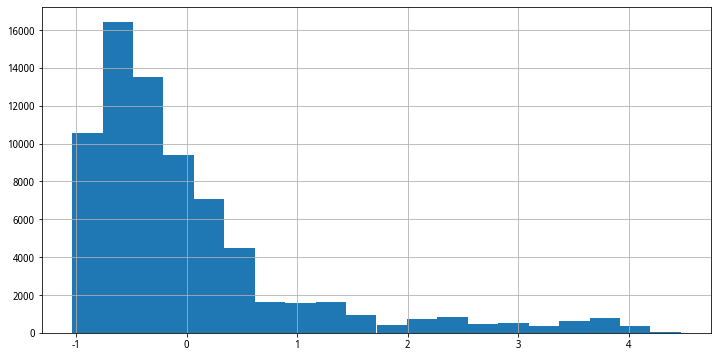

In [24]:
series_facs_data_two=df_facs_data_two['basic_earnings_per_share']
series_facs_data_two = series_facs_data_two.groupby(level = 'date').apply(winsorize_series)
series_facs_data_two = series_facs_data_two.groupby(level = 'date').apply(standardize_series)
series_facs_data_two.hist(figsize=(12,6),bins=20)
df_facs_data_two['basic_earnings_per_share']=series_facs_data_two

In [25]:
facs_data_two_analysis=utils.get_clean_factor_and_forward_returns(series_facs_data_two,price)

Dropped 4.4% entries from factor data: 4.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [26]:
facs_data_two_analysis

1D        5D       10D    factor  \
date       asset                                                 
2019-01-02 000001.XSHE  0.009790  0.081610  0.140362  0.541576   
           000002.XSHE  0.007115  0.059832  0.063601  0.713510   
           000063.XSHE -0.039877  0.018405  0.038344 -1.004197   
           000069.XSHE  0.001678  0.045231  0.033499 -0.161730   
           000100.XSHE  0.007967  0.123473  0.067702 -0.752399   
           000157.XSHE  0.014401  0.048995  0.054755 -0.771623   
           000166.XSHE  0.022286  0.089120  0.084167 -0.798699   
           000333.XSHE -0.006586  0.070251  0.130624  2.680601   
           000338.XSHE -0.009262  0.026443  0.074069  0.013589   
           000413.XSHE  0.004492  0.082781  0.089496 -0.690394   
           000415.XSHE  0.008499  0.067989  0.082153 -0.468639   
           000423.XSHE -0.012643  0.026296  0.025537  1.534057   
           000425.XSHE -0.006200  0.018664  0.018664 -0.737778   
           000538.XSHE -0.026971  0.033087  0.070485  3.289817   
           000568.XSHE -0.037122 -0.002777  0.038132  1.540690   
           000596.XSHE -0.037122  0.021212  0.100757  2.369224   
           000625.XSHE  0.012082  0.125379  0.126893 -0.676856   
           000627.XSHE -0.008897  0.008915 -0.005335 -0.731008   
           000629.XSHE  0.040134  0.043478  0.113712 -0.679022   
           000630.XSHE  0.005140  0.035931  0.035931 -0.916481   
           000651.XSHE  0.003354  0.047765  0.098044  3.750114   
           000656.XSHE  0.011495 -0.027913 -0.021339 -0.460246   
           000661.XSHE -0.012816  0.051323  0.087243  3.847588   
           000671.XSHE  0.005838  0.042728  0.031071 -0.473784   
           000703.XSHE -0.006084  0.099131  0.076524  0.446809   
           000709.XSHE  0.003520  0.031608  0.066664 -0.572612   
           000723.XSHE -0.003135  0.031348  0.300940 -0.609165   
           000725.XSHE  0.000000  0.042613  0.034872 -0.870451   
           000728.XSHE  0.027101  0.106981  0.099846 -0.866390   
           000768.XSHE  0.034718  0.058117  0.064908 -0.888186   
...                          ...       ...       ...       ...   
2019-12-17 601838.XSHG -0.003378 -0.007883  0.021396  0.393548   
           601857.XSHG -0.005128 -0.020513 -0.003419 -0.716410   
           601877.XSHG  0.001139 -0.015572  0.017850  0.663074   
           601878.XSHG  0.099589  0.097536  0.142710 -0.709059   
           601881.XSHG  0.005263 -0.003509  0.018421 -0.500789   
           601888.XSHG -0.005840  0.018689  0.039014  1.666324   
           601898.XSHG -0.002045  0.000000  0.026585 -0.439533   
           601899.XSHG -0.005013  0.032581  0.150376 -0.805843   
           601901.XSHG  0.000000  0.113764  0.217697 -0.807069   
           601919.XSHG -0.011605 -0.011605  0.019342 -0.745813   
           601933.XSHG -0.010417  0.031250 -0.018229 -0.770315   
           601939.XSHG  0.001383 -0.005533  0.000000  0.136273   
           601985.XSHG  0.000000 -0.013619 -0.027237 -0.675981   
           601988.XSHG -0.002717 -0.002717  0.002717 -0.329272   
           601989.XSHG -0.005607 -0.024299 -0.020561 -0.901403   
           601992.XSHG -0.002967  0.017804  0.106825 -0.537542   
           601997.XSHG -0.007239 -0.019648 -0.011375  0.675325   
           601998.XSHG  0.001608 -0.014469 -0.008039  0.026012   
           603019.XSHG -0.006029 -0.057276 -0.052343 -0.623301   
           603156.XSHG -0.001414  0.006365  0.026521  1.044086   
           603160.XSHG -0.024903 -0.113013 -0.065924  3.713620   
           603259.XSHG -0.032311 -0.058793 -0.058078  0.356794   
           603260.XSHG -0.008742 -0.005380 -0.009079  0.160775   
           603288.XSHG -0.009302 -0.013953  0.000093  0.773335   
           603501.XSHG -0.015298 -0.000989 -0.054402 -0.758064   
           603799.XSHG -0.006534  0.098631  0.225576 -0.856073   
           603833.XSHG  0.058196  0.052481  0.114392  3.052056   
           603899.XSHG -0.006257 -0.032325  0.016475  0.101479   
    

In [27]:
facs_data_two_analysis['factor']=np.float128(facs_data_two_analysis['factor'])

In [28]:
IC_data_two=performance.factor_information_coefficient(facs_data_two_analysis)

In [29]:
IC_data_two

,1D,5D,10D
date,,,
2019-01-02,-0.398910,-0.261901,-0.106113
2019-01-03,-0.128494,-0.052349,0.090605
2019-01-04,-0.096266,0.108105,0.299426
2019-01-07,-0.046881,0.098248,0.422225
2019-01-08,0.379949,0.218264,0.450336
2019-01-09,0.130520,0.235637,0.424012
2019-01-10,-0.034769,0.282330,0.362937
2019-01-11,-0.205110,0.390198,0.477793
2019-01-14,0.244660,0.507698,0.491642


In [30]:
IC_data_two_mean=IC_data_two.iloc[:,0].mean()
IC_data_two_std=IC_data_two.iloc[:,0].std()

In [31]:
IC_data_two_mean

0.017506117699297753

In [32]:
IC_data_two_std

0.17765541217034803

In [33]:
freq_two=IC_data_two[IC_data_two.iloc[:,0]>0.02].iloc[:,0].count()/IC_data_two.iloc[:,0].count()
freq_two

0.4829059829059829

In [34]:
IR_data_two=IC_data_two_mean/IC_data_two_std
IR_data_two

0.09853973760456959

In [35]:
factor_two_return=performance.factor_returns(facs_data_two_analysis)
factor_two_return

,1D,5D,10D
date,,,
2019-01-02,-0.009235,-0.012346,-0.001390
2019-01-03,-0.006162,-0.000277,0.010504
2019-01-04,-0.003642,0.006256,0.023124
2019-01-07,-0.000569,0.005743,0.030701
2019-01-08,0.007967,0.015229,0.028518
2019-01-09,0.001832,0.010383,0.023239
2019-01-10,0.000498,0.010209,0.020436
2019-01-11,-0.004023,0.016244,0.025968
2019-01-14,0.008773,0.024672,0.031074


In [36]:
mean_factor_two_return=factor_two_return.iloc[:,0].mean()
mean_factor_two_return

0.00020105810707214488

In [38]:
#选取前百分之二十的股票
df_facs_data_two=df_facs_data_two.reset_index()

,date,order_book_id,basic_earnings_per_share
0,2019-01-02,000001.XSHE,0.541576
1,2019-01-02,000002.XSHE,0.713510
2,2019-01-02,000063.XSHE,-1.004197
3,2019-01-02,000069.XSHE,-0.161730
4,2019-01-02,000100.XSHE,-0.752399
5,2019-01-02,000157.XSHE,-0.771623
6,2019-01-02,000166.XSHE,-0.798699
7,2019-01-02,000333.XSHE,2.680601
8,2019-01-02,000338.XSHE,0.013589
9,2019-01-02,000413.XSHE,-0.690394


In [47]:
df_facs_data_two_mean_eps=df_facs_data_two.groupby('order_book_id').mean().sort_values(by=['basic_earnings_per_share'],
                                                                                      ascending=False)

In [56]:
df_facs_data_two_mean_eps

,basic_earnings_per_share
order_book_id,
600519.XSHG,3.745119
601318.XSHG,3.745119
002304.XSHE,3.745085
000661.XSHE,3.688420
600585.XSHG,3.626076
000596.XSHE,3.029914
000651.XSHE,3.015125
000858.XSHE,3.001536
601336.XSHG,2.971683


In [63]:
df_facs_data_two_mean_eps_top=df_facs_data_two_mean_eps[:60]
df_facs_data_two_mean_eps_top

,basic_earnings_per_share
order_book_id,
600519.XSHG,3.745119
601318.XSHG,3.745119
002304.XSHE,3.745085
000661.XSHE,3.688420
600585.XSHG,3.626076
000596.XSHE,3.029914
000651.XSHE,3.015125
000858.XSHE,3.001536
601336.XSHG,2.971683


In [68]:
#获取前百分之二十的股票的收益率
stockList=df_facs_data_two_mean_eps_top.index

In [71]:
all_close=get_price(stockList,'2019-01-01','2019-12-31',fields='close')

In [72]:
all_close

,002032.XSHE,601888.XSHG,000423.XSHE,600516.XSHG,002841.XSHE,000001.XSHE,603156.XSHG,600009.XSHG,601607.XSHG,603259.XSHG,...,603160.XSHG,601009.XSHG,002304.XSHE,601997.XSHG,002624.XSHE,601628.XSHG,600570.XSHG,000596.XSHE,601336.XSHG,600036.XSHG
2019-01-02,51.1309,59.4132,38.3059,11.3758,55.5253,9.0908,28.1663,49.9889,16.0106,51.0586,...,72.6945,6.0846,88.6886,7.3164,27.1299,19.8310,38.7196,52.0927,40.4595,23.9266
2019-01-03,47.2393,56.6114,37.8216,11.1812,54.6220,9.1798,28.1933,49.3141,16.1571,50.8315,...,72.1664,6.1228,86.5371,7.3441,26.1571,20.0397,39.1487,50.1589,41.0309,24.2285
2019-01-04,49.2048,56.7307,38.5965,11.4698,55.8826,9.6447,28.4296,49.4332,16.3329,51.5199,...,72.2461,6.2566,87.9682,7.5379,26.4152,20.3678,40.8651,51.5106,42.7844,24.8420
2019-01-07,50.1678,57.7242,38.8386,11.5906,57.3814,9.6348,28.6455,49.3935,16.0399,51.2502,...,73.6910,6.2470,87.0239,7.5310,26.5045,20.1093,42.3594,51.6290,39.9078,24.8518
2019-01-08,50.1187,59.2145,39.0904,11.4698,56.9745,9.5557,28.4836,49.4531,16.0692,50.7747,...,74.3388,6.2184,88.4452,7.4756,25.4126,19.8707,42.1601,52.8030,38.7454,24.5596
2019-01-09,50.9147,60.5061,39.3132,11.5235,56.5874,9.8327,28.6185,50.2965,16.2939,51.2076,...,74.2790,6.2661,90.9277,7.5033,26.1075,20.2087,41.8076,53.1977,38.9916,25.0271
2019-01-10,49.5684,59.7113,38.7127,11.4027,56.9745,9.9909,28.4093,49.4134,16.0203,51.3425,...,74.1395,6.2470,89.7497,7.4549,25.8196,20.1789,42.1065,53.3851,38.5680,25.1731
2019-01-11,49.2048,60.2875,38.7417,11.4295,56.4583,10.0898,28.5645,48.7188,15.9324,51.3709,...,74.1395,6.2470,91.5118,7.4826,25.9189,20.3280,42.9111,54.3915,38.9030,25.7672
2019-01-14,49.8534,58.2210,38.2187,11.3087,55.2871,10.0008,28.1191,47.5083,15.6980,50.7818,...,73.7708,6.1802,90.4604,7.4549,24.7376,20.0497,42.4896,54.6578,38.6173,25.6211
2019-01-15,50.4135,60.3869,39.4391,11.4429,56.5377,10.1294,28.4768,47.9945,16.0301,51.3780,...,74.1395,6.2470,95.3086,7.5103,24.7475,20.3479,44.3440,58.5648,39.2281,26.0983


In [73]:
all_close_return=all_close.pct_change()

In [82]:
all_close_return

,002032.XSHE,601888.XSHG,000423.XSHE,600516.XSHG,002841.XSHE,000001.XSHE,603156.XSHG,600009.XSHG,601607.XSHG,603259.XSHG,...,603160.XSHG,601009.XSHG,002304.XSHE,601997.XSHG,002624.XSHE,601628.XSHG,600570.XSHG,000596.XSHE,601336.XSHG,600036.XSHG
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.076111,-0.047158,-0.012643,-0.017106,-0.016268,0.009790,0.000959,-0.013499,0.009150,-0.004448,...,-0.007265,0.006278,-0.024259,0.003786,-0.035857,0.010524,0.011082,-0.037122,0.014123,0.012618
2019-01-04,0.041607,0.002107,0.020488,0.025811,0.023079,0.050644,0.008381,0.002415,0.010881,0.013543,...,0.001104,0.021853,0.016537,0.026389,0.009867,0.016373,0.043843,0.026948,0.042736,0.025321
2019-01-07,0.019571,0.017513,0.006273,0.010532,0.026821,-0.001026,0.007594,-0.000803,-0.017939,-0.005235,...,0.020000,-0.001534,-0.010735,-0.000915,0.003381,-0.012692,0.036567,0.002299,-0.067235,0.000394
2019-01-08,-0.000979,0.025818,0.006483,-0.010422,-0.007091,-0.008210,-0.005652,0.001207,0.001827,-0.009278,...,0.008791,-0.004578,0.016332,-0.007356,-0.041197,-0.011865,-0.004705,0.022739,-0.029127,-0.011758
2019-01-09,0.015882,0.021812,0.005700,0.004682,-0.006794,0.028988,0.004736,0.017055,0.013983,0.008526,...,-0.000804,0.007671,0.028068,0.003705,0.027345,0.017010,-0.008361,0.007475,0.006354,0.019035
2019-01-10,-0.026442,-0.013136,-0.015275,-0.010483,0.006841,0.016089,-0.007310,-0.017558,-0.016792,0.002634,...,-0.001878,-0.003048,-0.012955,-0.006450,-0.011027,-0.001475,0.007149,0.003523,-0.010864,0.005834
2019-01-11,-0.007335,0.009650,0.000749,0.002350,-0.009060,0.009899,0.005463,-0.014057,-0.005487,0.000553,...,0.000000,0.000000,0.019633,0.003716,0.003846,0.007389,0.019109,0.018852,0.008686,0.023601
2019-01-14,0.013182,-0.034277,-0.013500,-0.010569,-0.020745,-0.008821,-0.015593,-0.024847,-0.014712,-0.011468,...,-0.004973,-0.010693,-0.011489,-0.003702,-0.045577,-0.013690,-0.009823,0.004896,-0.007344,-0.005670
2019-01-15,0.011235,0.037201,0.031932,0.011867,0.022620,0.012859,0.012721,0.010234,0.021156,0.011740,...,0.004998,0.010809,0.053595,0.007431,0.000400,0.014873,0.043644,0.071481,0.015817,0.018625


In [85]:
all_close_return_mean=all_close_return.mean(axis=1)
all_close_return_mean

2019-01-02         NaN
2019-01-03   -0.013989
2019-01-04    0.023041
2019-01-07    0.005363
2019-01-08   -0.002581
2019-01-09    0.016341
2019-01-10   -0.004205
2019-01-11    0.005951
2019-01-14   -0.010980
2019-01-15    0.027313
2019-01-16    0.004760
2019-01-17   -0.004093
2019-01-18    0.023232
2019-01-21    0.008545
2019-01-22   -0.013802
2019-01-23    0.001860
2019-01-24    0.005942
2019-01-25    0.009694
2019-01-28    0.000063
2019-01-29    0.009049
2019-01-30   -0.007828
2019-01-31    0.006150
2019-02-01    0.016297
2019-02-11    0.022294
2019-02-12    0.007894
2019-02-13    0.016039
2019-02-14    0.004727
2019-02-15   -0.021652
2019-02-18    0.033628
2019-02-19   -0.006331
                ...   
2019-11-20   -0.006431
2019-11-21   -0.007355
2019-11-22   -0.011082
2019-11-25    0.006821
2019-11-26    0.003987
2019-11-27   -0.006087
2019-11-28   -0.004127
2019-11-29   -0.009988
2019-12-02    0.000485
2019-12-03    0.001479
2019-12-04   -0.002015
2019-12-05    0.007578
2019-12-06 

In [101]:
all_close_return_mean=pd.DataFrame(all_close_return_mean)
all_close_return_mean.columns=['return']
all_close_return_mean

,return
2019-01-02,NaN
2019-01-03,-0.013989
2019-01-04,0.023041
2019-01-07,0.005363
2019-01-08,-0.002581
2019-01-09,0.016341
2019-01-10,-0.004205
2019-01-11,0.005951
2019-01-14,-0.010980
2019-01-15,0.027313


In [ ]:
#获取上证指数收益率

In [91]:
index_component=index_components('000001.XSHG')

In [92]:
SZ_close=get_price(index_component,'2019-01-01','2019-12-31',fields='close')
SZ_close

,600146.XSHG,601000.XSHG,601368.XSHG,603828.XSHG,603920.XSHG,600173.XSHG,600365.XSHG,600818.XSHG,600641.XSHG,600352.XSHG,...,603358.XSHG,603978.XSHG,603089.XSHG,603810.XSHG,603986.XSHG,603558.XSHG,603179.XSHG,600986.XSHG,600961.XSHG,600768.XSHG
2019-01-02,6.52,2.3014,5.6158,5.8550,11.5756,3.7035,3.65,10.4282,8.9083,9.2629,...,10.4143,19.04,11.4133,38.3853,59.5786,10.7288,15.7875,4.1497,7.55,9.68
2019-01-03,6.64,2.3014,5.6453,5.8857,11.5756,3.6253,3.66,10.9556,8.9477,8.7609,...,10.3850,19.05,11.3589,36.6880,58.9808,10.7885,16.0509,4.1497,7.53,9.71
2019-01-04,6.69,2.3404,5.7533,5.9240,11.8273,3.7132,3.76,11.1944,9.0952,8.8987,...,10.5606,19.49,11.6173,37.1123,60.5051,10.9078,16.7632,4.4090,7.59,9.99
2019-01-07,6.85,2.3892,5.8416,6.0161,11.8950,3.8305,3.84,11.2641,9.1640,9.0070,...,10.5898,19.98,11.7534,37.8623,62.6671,11.0271,16.4217,4.4489,7.67,10.23
2019-01-08,6.85,2.4282,5.8809,6.0161,11.7885,3.7914,3.83,10.9556,9.2230,9.0267,...,10.6386,19.91,11.5901,36.8854,60.9734,11.3950,16.3241,4.4589,7.71,10.18
2019-01-09,6.77,2.4282,5.8809,6.0698,11.6434,3.8012,3.86,11.5328,9.2033,9.0661,...,10.8141,19.88,12.0935,37.0136,61.8900,11.3155,16.4900,4.4290,7.74,10.24
2019-01-10,6.66,2.4282,5.8711,6.1005,11.7498,3.7816,3.85,11.2641,9.2525,9.0857,...,10.7068,19.57,11.8350,36.6683,60.8937,11.1962,16.0997,4.5188,7.87,10.30
2019-01-11,6.83,2.4379,5.9006,6.1696,11.9047,3.8110,3.92,11.0452,9.3115,9.0857,...,11.0969,20.13,11.8214,38.0892,61.0033,10.7189,16.3924,4.4988,7.92,10.34
2019-01-14,6.51,2.4282,5.8711,6.5226,11.7111,3.8305,3.96,11.0352,9.3705,9.0267,...,10.9018,19.82,11.4745,36.7768,58.2634,10.7090,16.0021,4.4589,8.22,10.35
2019-01-15,6.58,2.4379,5.9398,6.5379,11.8273,3.8696,4.03,11.1248,9.4295,9.2039,...,10.9214,20.20,11.6717,37.1518,59.8774,10.3112,16.6169,4.5188,8.40,10.32


In [93]:
SZ_return=SZ_close.pct_change()
SZ_return

,600146.XSHG,601000.XSHG,601368.XSHG,603828.XSHG,603920.XSHG,600173.XSHG,600365.XSHG,600818.XSHG,600641.XSHG,600352.XSHG,...,603358.XSHG,603978.XSHG,603089.XSHG,603810.XSHG,603986.XSHG,603558.XSHG,603179.XSHG,600986.XSHG,600961.XSHG,600768.XSHG
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.018405,0.000000,0.005253,0.005243,0.000000,-0.021115,0.002740,0.050574,0.004423,-0.054195,...,-0.002813,0.000525,-0.004766,-0.044217,-0.010034,0.005564,0.016684,0.000000,-0.002649,0.003099
2019-01-04,0.007530,0.016946,0.019131,0.006507,0.021744,0.024246,0.027322,0.021797,0.016485,0.015729,...,0.016909,0.023097,0.022749,0.011565,0.025844,0.011058,0.044378,0.062486,0.007968,0.028836
2019-01-07,0.023916,0.020851,0.015348,0.015547,0.005724,0.031590,0.021277,0.006226,0.007564,0.012170,...,0.002765,0.025141,0.011715,0.020209,0.035733,0.010937,-0.020372,0.009050,0.010540,0.024024
2019-01-08,0.000000,0.016323,0.006728,0.000000,-0.008953,-0.010208,-0.002604,-0.027388,0.006438,0.002187,...,0.004608,-0.003504,-0.013894,-0.025801,-0.027027,0.033363,-0.005943,0.002248,0.005215,-0.004888
2019-01-09,-0.011679,0.000000,0.000000,0.008926,-0.012309,0.002585,0.007833,0.052685,-0.002136,0.004365,...,0.016497,-0.001507,0.043434,0.003476,0.015033,-0.006977,0.010163,-0.006706,0.003891,0.005894
2019-01-10,-0.016248,0.000000,-0.001666,0.005058,0.009138,-0.005156,-0.002591,-0.023299,0.005346,0.002162,...,-0.009922,-0.015594,-0.021375,-0.009329,-0.016098,-0.010543,-0.023669,0.020275,0.016796,0.005859
2019-01-11,0.025526,0.003995,0.005025,0.011327,0.013183,0.007774,0.018182,-0.019433,0.006377,0.000000,...,0.036435,0.028615,-0.001149,0.038750,0.001800,-0.042631,0.018180,-0.004426,0.006353,0.003883
2019-01-14,-0.046852,-0.003979,-0.004999,0.057216,-0.016262,0.005117,0.010204,-0.000905,0.006336,-0.006494,...,-0.017581,-0.015400,-0.029345,-0.034456,-0.044914,-0.000924,-0.023810,-0.008869,0.037879,0.000967
2019-01-15,0.010753,0.003995,0.011701,0.002346,0.009922,0.010208,0.017677,0.008119,0.006296,0.019631,...,0.001798,0.019173,0.017186,0.010197,0.027702,-0.037146,0.038420,0.013434,0.021898,-0.002899


In [94]:
SZ_return_mean=SZ_return.mean(axis=1)
SZ_return_mean

2019-01-02         NaN
2019-01-03   -0.003785
2019-01-04    0.024352
2019-01-07    0.017981
2019-01-08   -0.001016
2019-01-09    0.003981
2019-01-10   -0.001510
2019-01-11    0.008231
2019-01-14   -0.004758
2019-01-15    0.010108
2019-01-16   -0.000966
2019-01-17   -0.007493
2019-01-18    0.007651
2019-01-21    0.005056
2019-01-22   -0.008563
2019-01-23    0.002288
2019-01-24    0.003570
2019-01-25   -0.006801
2019-01-28   -0.006486
2019-01-29   -0.016601
2019-01-30   -0.012710
2019-01-31   -0.017069
2019-02-01    0.024807
2019-02-11    0.024496
2019-02-12    0.013290
2019-02-13    0.015864
2019-02-14    0.004341
2019-02-15   -0.002741
2019-02-18    0.030685
2019-02-19    0.003226
                ...   
2019-11-20   -0.005818
2019-11-21   -0.000777
2019-11-22   -0.005611
2019-11-25    0.003568
2019-11-26   -0.001689
2019-11-27   -0.001815
2019-11-28   -0.003840
2019-11-29    0.000227
2019-12-02    0.000764
2019-12-03    0.005832
2019-12-04    0.001334
2019-12-05    0.008040
2019-12-06 

In [100]:
SZ_return_mean=pd.DataFrame(SZ_return_mean)
SZ_return_mean.columns=['return']
SZ_return_mean

,return
2019-01-02,NaN
2019-01-03,-0.003785
2019-01-04,0.024352
2019-01-07,0.017981
2019-01-08,-0.001016
2019-01-09,0.003981
2019-01-10,-0.001510
2019-01-11,0.008231
2019-01-14,-0.004758
2019-01-15,0.010108


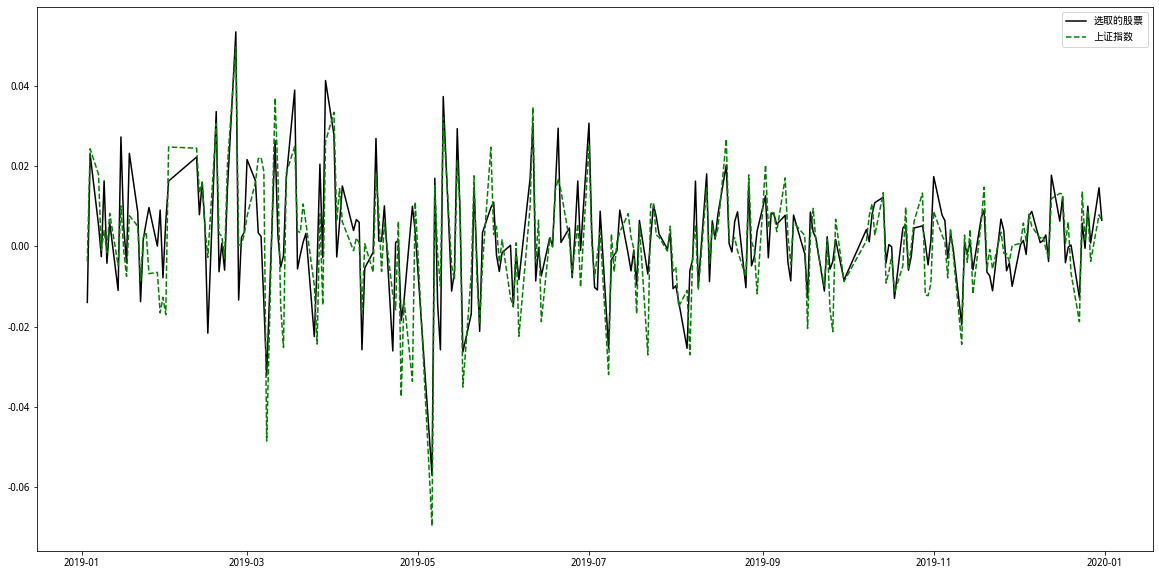

In [108]:
from matplotlib import pyplot as plt
y1=all_close_return_mean['return']
y2=SZ_return_mean['return']
x=SZ_return_mean.index
plt.figure(figsize=(20,10))
plt.plot(x,y1,label="选取的股票",color="#000000")
plt.plot(x,y2,label="上证指数",color="#008000",linestyle="--")
plt.legend()
plt.show()